# <font color = 'pickle'>**NLP Training and Inference - Complete workflow** </font>

# <font color = 'pickle'>**Binary Classification - Sentiment Analysis with the IMDB Dataset** </font>







## Outline
1. **Setting up the Environment**: Installing necessary libraries and setting up paths.
2. **Exploring and Understanding IMDB Dataset**: Understanding the structure and content of the dataset.

3. **Data Preprocessing**: Techniques to prepare the data for training, including handling different data splits and tokenization
4. **Training the Model**: Feeding data and adjusting weights.
5. **Inference**: Evaluate model on test set and making predictions.



# <font color = 'pickle'> **Setting up the Environment** </font>

We will install\update  libraries and mount google drive.

1. **Updating/Installing Libraries**: Google colab instances may not always have the latest versions of libraries. Thus, it's common to install or update libraries at the beginning of a session to ensure access to the latest features and avoid compatibility issues.
  
2. **Mounting Google Drive**: Mounting Google Drive in Colab allows direct access to your files stored on Drive, providing a seamless way to read and write data without repeatedly uploading it. It also ensures data persistence beyond the current Colab session, as any data saved locally in Colab is lost after the session ends.

In [1]:
from pathlib import Path
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount("/content/drive")
    !pip install datasets transformers evaluate wandb accelerate -U -qq
    base_folder = Path("/content/drive/MyDrive/data")
else:
    base_folder = Path("/home/harpreet/Insync/google_drive_shaannoor/data")


Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 25.2 MB/s eta 0:00:00
     ━━━━━

**Code Explanation:**

This code is designed to set up the environment depending on whether it's being run in Google Colab or locally:

1. **`from pathlib import Path`**: Imports the `Path` class from the `pathlib` module to handle filesystem paths more intuitively.
  
2. **`if 'google.colab' in str(get_ipython()):`**: Checks if the code is running inside Google Colab.

    - **Google Drive Mounting**: If in Colab, it imports necessary tools to mount Google Drive (`from google.colab import drive`) and then mounts the user's Google Drive to the path `/content/drive`.
  
    - **Library Installation**: Installs or updates several Python packages (`datasets`, `transformers`, `evaluate`, `wandb`, `accelerate`) to ensure they're available and up-to-date in the Colab environment.
  
    - **Set `base_folder` Path**: Sets the `base_folder` variable to a directory in the user's Google Drive, making it easier to access data stored there.

3. **`else:`**: If the code is not running in Colab (e.g., it's being executed locally):

    - **Set `base_folder` Path**: The `base_folder` variable is set to a specified local directory path on the user's machine.

In essence, the code prepares the environment by ensuring the right data paths and libraries are in place, whether it's running in Google Colab or on a local machine.

# <font color = 'pickle'> **Exploring and Understanding Dataset**

## <font color = 'pickle'> **IMDB Dataset**</font>

- This is a dataset for binary sentiment classification i.e. it has two outputes (positive sentiment and negative sentiment). The dataset has a set of 25,000 movie reviews for training, and 25,000 for testing.

- The labels for this dataset are binary, reflecting positive or negative sentiments. A label of '0' typically represents a negative sentiment, while a label of '1' signifies a positive sentiment. These labels provide a simplified way to analyze the underlying emotions expressed in the movie reviews.

- The dataset can be accessed via the following link: http://ai.stanford.edu/~amaas/data/sentiment/

- Additionally, the dataset is conveniently available on the HuggingFace platform. For the purposes of this notebook, we'll source the data from HuggingFace.



## <font color = 'pickle'> **Load Data set**
    


In [2]:
from datasets import load_dataset, DatasetDict


This line imports two entities from the datasets library:

- load_dataset: A function that allows users to download and load various datasets available in the Hugging Face's datasets repository.
- DatasetDict: A class that represents a dictionary of datasets, with each key-value pair corresponding to a specific split (like "train", "test", etc.) and its corresponding dataset.

In [3]:
imdb_dataset = load_dataset("imdb")


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

**Code Explanation:**

This line uses the load_dataset function to download and load the IMDB dataset. The IMDB dataset is a set of movie reviews that are labeled as either positive or negative. Once loaded, the dataset will be stored in the imdb_dataset variable, which will be an instance of DatasetDict. This means you can access different splits of the dataset (like training or testing data) using dictionary-style indexing.

## <font color = 'pickle'> **Understanding your data**

In [4]:
print(imdb_dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


- The Hugging Face dataset is structured similarly to a Python dictionary,
with each key corresponding to a different split such as training, testing, and validation.
- There are three primary splits in the IMDB dataset: training, testing, and validation.
- We can use the usual dictionary syntax to access individual splits, allowing for easy navigation and manipulation.


## <font color = 'pickle'> **Understanding the datatype of columns**


In [5]:
imdb_dataset['train'].features


{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

 Code Explanation:

 The code imdb_dataset['train'].features returns a description of the features (columns, fields, and their data types) present in the training split of the IMDB dataset.

 The "text" column is of string data type. It represents the movie review.

 The "label" column is described by a ClassLabel object, which contains information about the class names and their corresponding integer mappings. In this specific case, there are two class names: 'neg' (negative) and 'pos' (positive). These names would typically correspond to integer values, 0 for 'neg' and 1 for 'pos'.

## <font color = 'pickle'> **Acess indivdual element** </font>
 The dataset behaves like an Python array or list. We can use the familiar indexing/slicing methods to access individual elements.

In [6]:
# get the first example of the dataset
imdb_dataset['train'][0]


{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

We can see that single example is a dictioary with keys as column names. In this case we have two columns - text and label. The text is the text of the review and label tells the sentiment. Here label '0' means negative sentiment.

In [7]:
# get label of last ten examples
imdb_dataset['train']['label'][-10:]


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

## <font color = 'pickle'> **Exploratory Data Analysis (EDA)**

### <font color = 'pickle'> **Change dataset format to Pandas**  </font>
We will convert the datasets to Pandas DataFrames for visualization and Exploratory Data Analysis (EDA) because Pandas provides a wide range of tools and functions that simplify data manipulation, aggregation, and visualization, making it an ideal choice for these tasks

In [8]:
# this will convert all the splits into Pandas dataframe
imdb_dataset.set_format(type='pandas')


In [9]:
# get all rows from tarining split
df_train = imdb_dataset['train'][:]


After setting the format to 'pandas', accessing the dataset with dictionary-style indexing (like imdb_dataset['train']) will return the data in the specified format. Here, the [:] is a slicing operation that retrieves all rows from the training split. Since you've set the format to 'pandas', df_train will be a pandas DataFrame containing all the reviews and labels from the training split of the IMDB dataset.

In [10]:
df_train.head()


,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


In [11]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


### <font color = 'pickle'> **Visualize distribution of class labels** </font>
It is important to undetrstand the distribution of the class labels to check if there is any imbalance among the categories.

<Axes: >

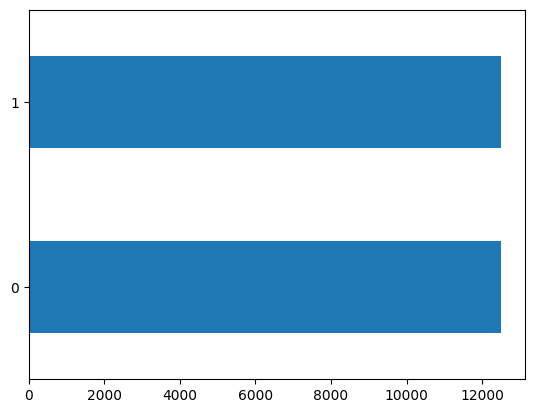

In [12]:
# check distribution of class labels in training dataset
df_train['label'].value_counts(ascending=True).plot.barh()


This line of code will create and display a horizontal bar plot showing the distribution of class labels in the 'label' column of the training dataset (df_train). The plot can help visualize the distribution of the classes, allowing you to quickly see if there are any imbalances among the categories. Here's a breakdown of what it does:

- df_train['label']: This selects the 'label' column from the DataFrame df_train.

- .value_counts(ascending=True): This method counts the occurrences of each unique value in the 'label' column and returns a Series object with the counts. By passing the argument ascending=True, the method ensures that the counts are sorted in ascending order, so the least frequent labels will be listed first.

- .plot.barh(): This method creates a horizontal bar plot of the Series object returned by the value_counts method.



### <font color = 'pickle'> **Check length of the reviews** </font>
Lot of NLP models have a fixed maximum input length (more about this in later lectures). Texts longer than this must be truncated or handled in a way that they fit within the model's constraints. Understanding the lengths helps in making appropriate preprocessing decisions that align with the model's expectations.

In [13]:
df_train['words_per_review'] = df_train['text'].str.split().apply(len)


The code df_train['text'].str.split().apply(len) calculates the number of words in each movie review within the df_train DataFrame.
- It first accesses the 'text' column of the DataFrame, which contains the movie reviews.
- Then, using the .str.split() method, each review is split into a list of words based on whitespace.
- The .apply(len) method is subsequently used to count the number of words in each of these lists.
- The resulting word counts are stored in a new column in the DataFrame called 'words_per_review'.

In [14]:
df_train.head()


,text,label,words_per_review
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,288
1,"""I Am Curious: Yellow"" is a risible and preten...",0,214
2,If only to avoid making this type of film in t...,0,93
3,This film was probably inspired by Godard's Ma...,0,118
4,"Oh, brother...after hearing about this ridicul...",0,311


#### <font color = 'pickle'> **Plot the distribution of review length** </font>

Explanation of code below:


- The provided code snippet leverages the matplotlib library, a popular data visualization tool in Python, to plot a histogram of the number of words in each movie review from the df_train DataFrame.
- First, it imports the necessary pyplot module from matplotlib under the alias plt.
- The df_train['words_per_review'].hist() function is then used to generate a histogram with 50 bins, and each bin's edge is colored black.
- To enhance the visualization's clarity, the x-axis is labeled as 'Number of Words' and the y-axis as 'Frequency', with an overarching title 'Distribution of Words per Review'.
- Finally, the plt.show() function is invoked to display the histogram to the user.

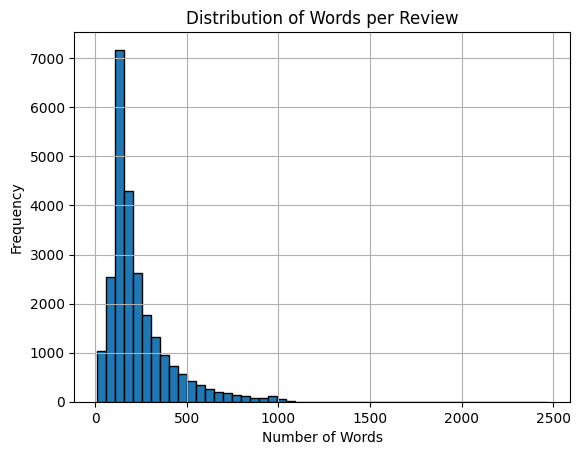

In [15]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'words_per_review' column
df_train['words_per_review'].hist(bins=50, edgecolor='black')

# Adding labels and a title for clarity
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Words per Review')

# Display the plot
plt.show()


In [16]:
# The model we are going to use has token (subwords) limit of 512.
# Let us check how many reviews has more than 500 words

count = (df_train['words_per_review'] > 500).sum()
print(f"Number of reviews with more than 400 words: {count}")


Number of reviews with more than 400 words: 2018


<Axes: title={'center': 'words_per_review'}, xlabel='label'>

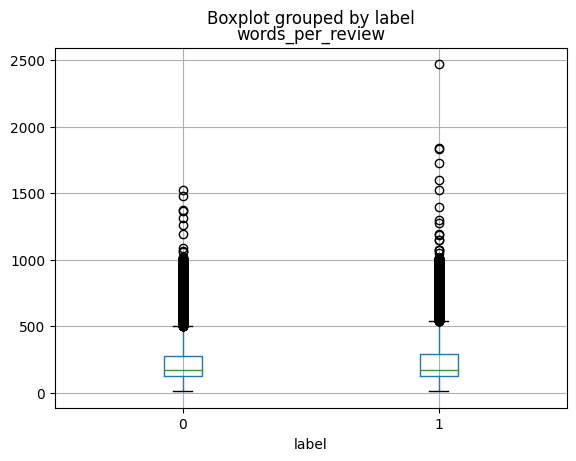

In [17]:
# distribution of number of words for each class label
df_train.boxplot('words_per_review', by='label')


From the above graph, it seems that the distribution of number of words is similar for positive and negative reviews.

### <font color = 'pickle'> **Reset dataset format** </font>
After completing the Exploratory Data Analysis (EDA), we will no longer need the Pandas DataFrame. The next step will be tokenization. For this phase, we will use Tokenizer library from Hugging Face. Huggingface Tokenizer integrates seamlessly with Hugging Face datasets.Therefore, we will convert the dataset back to the Hugging Face dataset format.

In [18]:
imdb_dataset.reset_format()


In [19]:
imdb_dataset


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

#<font color = 'pickle'> **Data Pre-processing**</font>

## <font color = 'pickle'> **Accessing and Manuplating Splits**</font>
- You might not always need all the splits and may have to perform specific tasks using only individual ones. For example, in the IMDB dataset for text classification, we do not need the unsupervised split. The unsupervised split does not have labels and is not useful for the text classification task.
- We might also want to extract the test split and further create two subdivisions - test and validation splits from this. We can use the validation split during training to tune hyperparameters and reserve the test split solely for final model evaluation.

### <font color = 'pickle'> **Extract Splits**

In [20]:
train_split = imdb_dataset['train']
test_validation_dataset = imdb_dataset["test"]


In [21]:

train_split


Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

### <font color = 'pickle'> **Create futher subdivions of the splits** </font>

In [22]:
# Split the test set into test and validation sets
test_val_splits = imdb_dataset["test"].train_test_split(
    test_size=0.5, seed=42)  # 50% for validation, 50% for test

# Extract the test and validation splits
valid_split = test_val_splits["train"]
test_split = test_val_splits["test"]


### <font color = 'pickle'> **Create subset for experimentation** </font>

In [23]:
train_split_small = train_split.shuffle(seed=42).select(range(500))
val_split_small = valid_split.shuffle(seed=42).select(range(100))
test_split_small = test_split.shuffle(seed=42).select(range(100))


### <font color = 'pickle'> **Combine splits**</font>
Some times we will need to combine different splits to one dataset. This is very useful when we have to apply the same pre-processing to all the splits.
In our example, we will combine train and validation splits as we will be applying the same processing steps to both the splits.


In [24]:
train_val = DatasetDict(
    {"train": train_split, "valid": valid_split})
train_val_small = DatasetDict(
    {"train": train_split_small, "valid": val_split_small})


The code snippet creates a `DatasetDict` object named `train_val_dataset`, which is a special dictionary-like structure designed for managing datasets. Within this object, two key-value pairs are defined: "train" and "valid". The key "train" is associated with the `train_split_small` dataset, representing a subset or smaller version of the original training data. Similarly, the key "valid" is paired with the `val_split_small` dataset, signifying a subset or smaller version of the validation data. This structure allows for organized and efficient access to both the training and validation subsets, facilitating their use in subsequent data processing or machine learning tasks.

In [25]:
train_val_small


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 500
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 100
    })
})

## <font color = 'pickle'> **Tokenization**</font>

Tokenization is the process of dividing a sequence of text into smaller parts called tokens.

**Why we need Tokenization?**

In natural language processing (NLP), this is an essential preprocessing step. NLP models do not accept raw strings directly; instead, these<font color = 'indianred'> **models expect the input text to be tokenized and converted into numerical vectors**.</font>

**Tokenization Approaches**

Let's explore the three common tokenization strategies - word, character, and subword - and examine their advantages and disadvantages.

1. **Word Tokenization**: It breaks the text into individual words. This is the most intuitive way to split text but can suffer from Out-of-Vocabulary (OOV) Words (Words not found in the training vocabulary ) issues and rigidity in handling variations in words.

2. **Character Tokenization**: It breaks the text into individual characters, offering flexibility to represent any string. This can help to deal with OOV, rare words and mis-spellings. However, we lose semantic information and NLP model will need to learn linguistic structures like words from the data.

3. **Subword Tokenization**: Subword tokenization represents a middle ground between word and character tokenization, dividing text into units that may include whole words or character n-grams. This approach aims to harness the advantages of both character and word tokenization.

  - **Rare Words Handling**: Breaks down rare, complex, and misspelled words into smaller units, facilitating easier interpretation by the model.
  - **Frequent Words Preservation**: Retains frequently used words as individual entities, keeping input length manageable.
  - **Learning Process**: Subword tokenization learns from the pretraining corpus, distinguishing it from other methods.
  - **Algorithm Integration**: Utilizes a sophisticated mix of statistical rules and algorithms, enhancing adaptability and efficiency.

###  <font color = 'pickle'> **What is  pre-trained Tokenizer** </font>

The pre-trained tokenizer is the tokenizer (for a specific model) trained on a large corpus of text and has learned set of rules for breaking down words and sentences into tokens. Using these rules it has created a fixed vocabulary.This vocabulary is a mapping between unique tokens (words, subwords, or characters depending on the tokenizer's method) and unique IDs.

The tokenizer uses this fixed vocabulary to tokenize the new data that we pass. The tokenizer follows these steps to create subtokens for the new dataset:

- **Longest Match Rule**: The tokenizer looks for the longest matching subword token in its vocabulary. If the whole word is present in the vocabulary, it is not split, and the tokenizer takes the entire word as one token.

- **Subword Splitting**: If the word is not in the vocabulary or only a part of it is present, the tokenizer breaks it down into subword tokens. It selects the longest matching subword token from the beginning of the word and assigns it as the first token. Then, it looks for the longest matching subword token from the remaining part of the word and assigns it as the next token. This process continues until the entire word is covered by subword tokens.

###  <font color = 'pickle'> **Load pre-trained Tokenizer** </font>

Now that we've understood what tokenization is and explored the different approaches to it, we will move on to the practical implementation. One of the most powerful models in NLP is BERT (Bidirectional Encoder Representations from Transformers), and it relies heavily on subword tokenization (more precisely WordPiece Tokenization - see end of the notebook for more details).

Understanding and performing tokenization manually can be quite challenging. Fortunately, there are libraries like Hugging Face's Transformers that make this task straightforward. In our next step, we will download a pre-trained tokenizer specifically designed to work with BERT. This tokenizer will handle the conversion of our text into a format that BERT can understand.

In [26]:
from transformers import AutoTokenizer
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)


**Code Explanation**

Here's what the code is doing:

1. **Setting the Checkpoint**: `checkpoint = "bert-base-uncased"` specifies the pre-trained model we want to use. BERT has various versions, and "bert-base-uncased" refers to the base version trained on uncased English text.

2. **Importing the AutoTokenizer**: `from transformers import AutoTokenizer` imports the AutoTokenizer class from the Transformers library. This class can automatically recognize and download the correct tokenizer for the given pre-trained model.

3. **Loading the Tokenizer**: `tokenizer = AutoTokenizer.from_pretrained(checkpoint)` downloads and initializes the tokenizer for the specified checkpoint. This method takes care of downloading the required files and setting up the tokenizer with the correct configurations.

By using a pre-trained tokenizer, we ensure that our text is processed in the same way that the original BERT model was trained, allowing us to leverage the powerful pre-trained representations that BERT offers.



###  <font color = 'pickle'> **Understanding pre-trained Tokenizer**
We will now understand how the tokenizer work by feeding one simple example.

In [27]:
text = ["Tokenization is the process of splitting sequence to tokens",
        "I like BUAN6482"]


In [28]:
# get the vocab size
print(f'Pretrained tokenizer vocab size {tokenizer.vocab_size}')


Pretrained tokenizer vocab size 30522


- <font color = 'indianblue'>The vocab size for the tokenizer for bert-base-uncased model is 30522.

In [29]:
encoded_text = tokenizer(
    text, padding=True, truncation=True, return_tensors='pt')


Let us understand the arguments:

1. `padding = True`: This argument tells the tokenizer to add padding to the input text. BERT processes inputs in batches, and all sequences in a batch should have the same length. Padding adds special [PAD] tokens to make all sentences in the batch the same length.

4. `truncation = True`: This argument instructs the tokenizer to truncate the input text to a maximum length that BERT can handle. BERT has a maximum input length, and if a sentence is longer than that, it will be truncated. If you do not set truncation=True and you have a sequence length greater than teh model can take , the tokenizer will raise an error.

5. `return_tensors = 'pt'`: This argument tells the tokenizer to return the output in PyTorch tensor format. PyTorch tensors are data structures used for efficient numerical computations.

In summary, the code line takes an input text or a batch of texts, tokenizes them using the pretrained BERT tokenizer, and performs padding and truncation as needed. The final output is returned in the form of PyTorch tensors, which can be directly used as input to a BERT model for further processing or downstream tasks like text classification.

Now let us look at the output of the tokenizer, and try to understand the output


In [30]:
encoded_text


{'input_ids': tensor([[  101, 19204,  3989,  2003,  1996,  2832,  1997, 14541,  5537,  2000,
         19204,  2015,   102],
        [  101,  1045,  2066, 20934,  2319, 21084,  2620,  2475,   102,     0,
             0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]])}

- **input_ids**

    Input Ids are numerical identifiers assigned to each token from the input text. The tokenizer map each word or sub-word into a unique ID from its predefined vocabulary. It tries to match the whole word first. If unsuccessful, it splits the word into sub-words until each piece can be matched in the vocabulary, each represented by its corresponding ID. If a piece can't be found, a special [UNK] token is used. This process creates the `input_ids` list, a numerical representation of the input text.

- **'token_type_ids'**

    The token type IDs are used when BERT is fed with pairs of sentences or inputs with distinct segments (e.g., Question-Answer pairs). For single-sentence tasks, all token type IDs are typically set to 0. For tasks that require two separate segments of text, such as Question-Answer tasks, the token type IDs distinguish the segments. The first segment (e.g., the question) is assigned a token type ID of 0, and the second segment (e.g., the answer) is assigned a token type ID of 1.

- **attention_mask**

    The attention mask is a binary tensor that has the same length as the tokenized input sequence. It is used to instruct the BERT model about which tokens should be attended to (used) and which ones should be ignored during processing. The attention mask is essential when handling sequences with varying lengths. It works by setting a value of 1 for the tokens that should be attended to and 0 for the tokens that should be ignored (typically the padded tokens). This way, the model knows which tokens are actual input and which ones are just padding.

The attention_mask will become more clear , when we look at the sequences with special tokens.  We can get the tokens from input_ids by using the tokenizer’s convert_ids_to_tokens() method.

In [31]:
tokens_first_sentence = tokenizer.convert_ids_to_tokens(
    encoded_text.input_ids[0])
tokens_second_sentence = tokenizer.convert_ids_to_tokens(
    encoded_text.input_ids[1])

print(tokens_first_sentence)
print(tokens_second_sentence)


['[CLS]', 'token', '##ization', 'is', 'the', 'process', 'of', 'splitting', 'sequence', 'to', 'token', '##s', '[SEP]']
['[CLS]', 'i', 'like', 'bu', '##an', '##64', '##8', '##2', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']



Three things are worth noting in this tokenized sequence:
1. Special Tokens: We can observe special `[CLS]`, and `[SEP]` tokens added at the beginning and end of the sequence. We can also observe anpther token and `[PAD]` is added at the end of shorter sequence (example).
    - **[CLS] Token**: token stands for "classification" and is used at the beginning of each input sequence. It is essential for tasks like text classification, where BERT learns to encode the entire sequence's information into the representation of the [CLS] token.

    - **[SEP] Token**: This token stands for "separator" and is used to separate two different sequences in the input. When processing multiple sequences, BERT takes this separator token to distinguish between the end of one sequence and the start of another.

    - **[PAD] Token**: This token stands for "padding" and is used to make input sequences of equal length. BERT processes inputs in batches, and all sequences within a batch need to have the same length. If a sequence is shorter than the maximum length in the batch, it is padded with [PAD] tokens to match the length. In our example, the second sentence is smaller and hence the tokenizer add [PAD] tokens to the second sentence.

    Now we can also see that why we have four zeros in the attention_ask of the second sentence. We are telling model to not pay attention to these tokens ([PAD] tokens) and ignore these tokens.

2. Lowercasing: All the tokens have been converted to lowercase. This is a feature of this particular BERT checkpoint (**we have used -uncased version**), which helps standardize the text and ensures that the model treats different cases of the same word equally.

3. Subword Tokens: Some words like "tokenizing" and "tokens" have been split into multiple tokens, indicated by the presence of the `##` prefix. This happens because BERT breaks down less common or longer words into smaller subword tokens to handle them effectively. The `##` prefix indicates that these tokens should be merged with the previous token when converting the tokens back to a string.

The AutoTokenizer class offers a convenient method called convert_tokens_to_string() that allows us to revert the tokens back to their original textual representation. So, let's utilize this method to convert our tokens into string representtaion.






In [32]:
tokenizer.convert_tokens_to_string(tokens_first_sentence)


'[CLS] tokenization is the process of splitting sequence to tokens [SEP]'

In [33]:
tokenizer.convert_tokens_to_string(tokens_second_sentence)


'[CLS] i like buan6482 [SEP] [PAD] [PAD] [PAD] [PAD]'

In [34]:
special_tokens = tokenizer.all_special_tokens
special_tokens_ids = tokenizer.all_special_ids
print(special_tokens, special_tokens_ids)


['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]'] [100, 102, 0, 101, 103]


We have already explained '[SEP]', '[PAD]', '[CLS]' tokens. Now let us look at the other two special tokens.

- [UNK] Token: This token stands for "unknown" and is used to represent words that are not present in the model's vocabulary. During tokenization, if a word in the input sequence is not found in the pre-trained vocabulary, it is replaced with the [UNK] token.

- [MASK] Token: This token is used during pretraining BERT. It is used to mask certain words in the input sequence randomly. During training, BERT tries to predict these masked words based on the context provided by the other words in the sequence. This pretraining process helps BERT capture bidirectional context and understand language more effectively.

###  <font color = 'pickle'> **Create function for Tokenizer**

In [35]:
# we do not need to add padding
# padding and conversion to Pytorch Tensor is handled by the data collators
# in more efficient manner (explained later)

def tokenize_fn(batch):
    return tokenizer(batch["text"], truncation=True)


###  <font color = 'pickle'> **Use map function to apply tokenization to all splits**

In [36]:
tokenized_dataset = train_val.map(tokenize_fn, batched=True)
# tokenized_dataset = train_val_dataset.map(tokenize_fn, batched=True, batch_size=None)
# batch_size = None will apply the function to the whole dataset as a single batch


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/12500 [00:00<?, ? examples/s]

In [37]:
tokenized_dataset_small = train_val_small.map(tokenize_fn, batched=True)

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

**Code Explanation**:

- The code is taking a dataset (train_val), applying a tokenization function (tokenize_fn) to each batch of data, and then storing the tokenized results in a new dataset (tokenized_dataset). The resulting tokenized_dataset will have the same number of elements as the original dataset, but each element will now be in a tokenized form suitable for a transformer model.
- The default batch size is 1000.
- Using batched=True in the datasets library streamlines data processing by taking advantage of vectorized operations, leading to faster execution. This approach reduces the overhead from individual function calls and benefits from Hugging Face's tokenizers, which are optimized for batch processing. Additionally, batching can enhance memory use and improve I/O efficiency, especially for large datasets read from disk.



In [38]:
tokenized_dataset


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 25000
    })
    valid: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 12500
    })
})

We can see that tokenization step has added three new columns ('input_ids', 'token_type_ids', 'attention_mask') to the dataset

In [39]:
tokenized_dataset_small = tokenized_dataset_small.remove_columns(
    ['text']
)
tokenized_dataset = tokenized_dataset.remove_columns(
    ['text']
)

In [40]:
tokenized_dataset_small.set_format(type='torch')
tokenized_dataset.set_format(type='torch')

In [41]:
tokenized_dataset_small

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 500
    })
    valid: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 100
    })
})

In [42]:
tokenized_dataset_small['train'].features

{'label': ClassLabel(names=['neg', 'pos'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

In [43]:
print(len(tokenized_dataset_small["train"]["input_ids"][2]))
print(len(tokenized_dataset_small["train"]["input_ids"][1]))

237
159


The varying lengths in the dataset indicate that padding has not been applied yet. Instead of padding the entire dataset, we prefer processing small batches during training. Padding is done selectively for each batch based on the maximum length in the batch. We will discuss this in more detail in a later section of this notebook.

#  <font color = 'pickle'> **Model Training**

##  <font color = 'pickle'> **Model Config File**

###  <font color = 'pickle'> **Explanation of Model configuration file**</font>

- A configuration file, in the context of pretrained models like those in the Hugging Face Transformers library, is a vital component that details the model's architecture, hyperparameters, and other essential settings. It serves as a blueprint, guiding how the model is structured and operates.

- Specifically, for models intended for tasks like classification, two critical pieces of information are `id2label` and `label2id`.

- `id2label` is a dictionary mapping numerical IDs to their respective class labels, while `label2id` is its inverse, mapping class labels to their IDs. These mappings are fundamental for translating between human-readable class labels (like "positive" or "negative") and the numerical IDs the model uses internally during training and inference.

- By ensuring that the configuration file contains `id2label` and `label2id`, you guarantee a seamless conversion between model outputs and interpretable class labels. Without them, translating the model's predictions into understandable results can be cumbersome. Adding this information enhances the usability and clarity of the model, especially when deploying it for real-world applications.


###  <font color = 'pickle'> **Download config file of pre-trained Model**</font>



In [44]:
from transformers import AutoConfig

In [45]:
config = AutoConfig.from_pretrained(checkpoint)


In [46]:
config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.33.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

###  <font color = 'pickle'> **Modify Configuration File**</font>
- We need to modify configuration fie to add ids to  label and label to ids mapping
- Adding id2label and label2id to the configuration file provides a consistent, interpretable, and user-friendly way to handle model outputs.

In [47]:
class_names = tokenized_dataset["train"].features["label"].names
class_names


['neg', 'pos']

In [48]:
id2label = {}
for id_, label_ in enumerate(class_names):
    id2label[str(id_)] = label_
id2label


{'0': 'neg', '1': 'pos'}

Code Explanation:
- First, an empty dictionary, id2label, is initialized.
- The enumerate function returns both the index (or ID) and the value (or label) of each item in the class_names list as you loop through it.
- Within the loop, each numerical ID (id_) is converted to a string using str(id_) and then used as a key in the id2label dictionary. The corresponding class name (label_) from the class_names list is assigned as the value for that key.
- Why was numerical ID converted to string? - When the configuration is saved to disk, it's typically stored in a JSON format. JSON keys must be strings, so using non-string keys would cause serialization errors. By ensuring that the IDs are strings in Python, the configuration can be seamlessly serialized to and deserialized from JSON without any type conversion issues.

In [49]:
label2id = {}
for id_, label_ in enumerate(class_names):
    label2id[label_] = id_
label2id


{'neg': 0, 'pos': 1}

In [50]:
config.id2label = id2label
config.label2id = label2id


In [51]:
config


BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "neg",
    "1": "pos"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "neg": 0,
    "pos": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.33.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

##  <font color = 'pickle'> **Download pre-trained model**

In [52]:
from transformers import AutoModelForSequenceClassification


In [53]:
AutoModelForSequenceClassification.from_pretrained??

In [54]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, config=config)  # We are using the same checkpiont as we have used for tokenizer


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


The code snippet involves using the transformers library from Hugging Face to load a pretrained model tailored for sequence classification tasks.Here's a brief explanation:

- **Importing the Model Class:**
The line from transformers import AutoModelForSequenceClassification imports a specific model class designed to handle sequence classification tasks. This class automatically figures out the correct model architecture (e.g., BERT, GPT-2, RoBERTa) based on the provided checkpoint.

- **Loading the Pretrained Model:**
The AutoModelForSequenceClassification.from_pretrained() function is used to load a pretrained model. Two arguments are provided:

  - **checkpoint:** This specifies which pretrained model to load. Since the comment mentions that it's the "same checkpoint as used for the tokenizer," it suggests that the model and the tokenizer are both sourced from the same original pretrained model, ensuring compatibility.
  - **config:** This provides the configuration settings for the model, detailing its architecture, hyperparameters, and other related information.
  In summary, the code loads a pretrained model designed for sequence classification tasks using a specified checkpoint and configuration, making it ready for tasks like sentiment analysis or any other form of sequence-based categorization.

## <font color = 'pickle'> **Model Input/Collate Function** </font>

In [55]:
from transformers import DataCollatorWithPadding

In [56]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [57]:
features = [tokenized_dataset["train"][i] for i in range(2)]

In [58]:
features

[{'label': tensor(0),
  'input_ids': tensor([  101,  1045, 12524,  1045,  2572,  8025,  1011,  3756,  2013,  2026,
           2678,  3573,  2138,  1997,  2035,  1996,  6704,  2008,  5129,  2009,
           2043,  2009,  2001,  2034,  2207,  1999,  3476,  1012,  1045,  2036,
           2657,  2008,  2012,  2034,  2009,  2001,  8243,  2011,  1057,  1012,
           1055,  1012,  8205,  2065,  2009,  2412,  2699,  2000,  4607,  2023,
           2406,  1010,  3568,  2108,  1037,  5470,  1997,  3152,  2641,  1000,
           6801,  1000,  1045,  2428,  2018,  2000,  2156,  2023,  2005,  2870,
           1012,  1026,  7987,  1013,  1028,  1026,  7987,  1013,  1028,  1996,
           5436,  2003,  8857,  2105,  1037,  2402,  4467,  3689,  3076,  2315,
          14229,  2040,  4122,  2000,  4553,  2673,  2016,  2064,  2055,  2166,
           1012,  1999,  3327,  2016,  4122,  2000,  3579,  2014,  3086,  2015,
           2000,  2437,  2070,  4066,  1997,  4516,  2006,  2054,  1996,  2779,
     

In [59]:
model_input = data_collator(features)
model_input.keys()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])

In [60]:
print(model_input.input_ids[0][0:10])
print(model_input.input_ids[0][-20:])
print(model_input.input_ids[1][0:10])
print(model_input.input_ids[1][-20:])

tensor([  101,  1045, 12524,  1045,  2572,  8025,  1011,  3756,  2013,  2026])
tensor([1007, 1997, 4467, 5988, 1012, 2021, 2428, 1010, 2023, 2143, 2987, 1005,
        1056, 2031, 2172, 1997, 1037, 5436, 1012,  102])
tensor([ 101, 1000, 1045, 2572, 8025, 1024, 3756, 1000, 2003, 1037])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [61]:
print(model_input.attention_mask[0][-20:])
print(model_input.attention_mask[1][-20:])

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [62]:
print(tokenizer.convert_ids_to_tokens(model_input.input_ids[0][0:10]))

['[CLS]', 'i', 'rented', 'i', 'am', 'curious', '-', 'yellow', 'from', 'my']


In [63]:
print(tokenizer.convert_ids_to_tokens(model_input.input_ids[0][-10:]))

['doesn', "'", 't', 'have', 'much', 'of', 'a', 'plot', '.', '[SEP]']


In [64]:
print(tokenizer.convert_ids_to_tokens(model_input.input_ids[1][0:10]))

['[CLS]', '"', 'i', 'am', 'curious', ':', 'yellow', '"', 'is', 'a']


In [65]:
print(tokenizer.convert_ids_to_tokens(model_input.input_ids[1][-10:]))

['[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


##  <font color = 'pickle'> **Understanding Model Output**

In [66]:
# model output
model=model.to(device=0)
model_input= model_input.to(device=0)
model.train()
model_output = model(**model_input)

In [67]:
# keys in model output
model_output.keys()

odict_keys(['loss', 'logits'])

In [68]:
# let us look at logits
model_output.logits


tensor([[-0.1688, -0.4802],
        [ 0.1206, -0.6024]], device='cuda:0', grad_fn=<AddmmBackward0>)

**A logit is the raw, non-normalized output of a machine learning model**. In the context of binary classification using Hugging Face's Transformers library, the model produces two logits for a given input, each corresponding to one of the two classes (e.g., "positive" and "negative"). For instance, if the model outputs logits of [0.5082, 0.4145], the first value represents the inclination towards the "negative" class, and the second value represents the inclination towards the "positive" class. While logits can be converted into probabilities using functions like softmax for a clearer probabilistic interpretation, for direct classification, this step isn't mandatory. Simply comparing the magnitude of these logits can determine the predicted class, with the higher logit indicating the model's choice.

In [69]:
model_output.loss

tensor(0.4726, device='cuda:0', grad_fn=<NllLossBackward0>)

**Loss function**
- A loss function, often referred to simply as "loss," quantifies how well a machine learning model's predictions match the actual data. In essence, it measures the discrepancy between the predicted and true values, guiding the optimizer on how to adjust the model's parameters during training. The smaller the loss, the better the model's predictions align with the actual data.

- In the context of the provided code, specifically when using Hugging Face's `transformers` library, the loss function is implicitly defined based on the task and model at hand. For example, when using `AutoModelForSequenceClassification`, the library typically employs the cross-entropy loss for classification tasks. The advantage of high-level libraries like `transformers` is that they abstract away such details, making it easier and more efficient to train complex models without diving into every minute detail.

- Thus, there's no need to explicitly include the loss function in the code, as the library automatically selects and applies the appropriate loss based on the model and task configuration. This built-in functionality ensures that users can focus on higher-level model design and hyperparameter tuning without getting bogged down in the intricacies of loss function specification.

<br>

##  <font color = 'pickle'> **Evaluation metric(s)** </font>

**What is a evaluation metric?**
An evaluation metric is a tool used to gauge the accuracy or effectiveness of a model's predictions against actual outcomes. For example, using the IMDB dataset, which contains movie reviews classified as "positive" or "negative," an evaluation metric like accuracy would measure the proportion of reviews the model correctly predicts.

**Role in model training**
Evaluation metrics play a crucial role during the training of models, providing essential feedback to ensure the model's effectiveness and reliability. For training purposes, these metrics serve the following functions:

1. **Monitoring Progress**: They allow for the real-time monitoring of a model's performance during training epochs, giving insights into how well the model is learning from the data.
  
2. **Guiding Hyperparameter Tuning**: Hyperparameters, such as learning rate or batch size, can significantly impact model performance. Evaluation metrics provide a quantifiable measure to determine the best hyperparameter settings, leading to optimal training outcomes.

3. **Detecting Overfitting**: One of the challenges in training deep learning models is overfitting, where a model performs exceptionally well on training data but poorly on unseen data. By evaluating performance on a separate validation set and comparing it to the training set performance, discrepancies can indicate potential overfitting.

4. **Informing Early Stopping**: In some cases, continuously training a model doesn't necessarily lead to better performance; it might even degrade it. Monitoring evaluation metrics can help determine when a model's performance plateaus or starts deteriorating, signaling an opportune moment to halt training, a strategy known as early stopping.

5. **Model Selection**: When training multiple variations of a model or using different architectures, evaluation metrics serve as a comparative tool to select the best-performing model for the specific task at hand.

In essence, evaluation metrics act as a compass during the training process, ensuring that models are on the right track, learning effectively, and poised to generalize well to new, unseen data. Without these metrics, training would be akin to navigating unfamiliar terrain without a map or guide.

### <font color = 'pickle'> **Function to compute metric** </font>

In [70]:
import evaluate
import numpy as np

In [71]:
def compute_metrics(eval_pred):
    combined_metrics = evaluate.combine([evaluate.load("accuracy", average="macro"),
                                        evaluate.load("f1", average="macro")])

    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    evaluations = combined_metrics.compute(
        predictions=predictions, references=labels, average='macro')
    return evaluations


Code Explanation:

1. **Import `evaluate`**:
    The module `evaluate` is imported. This module presumably provides utilities for evaluating model predictions.

2. **Define `compute_metrics` Function**:
    A function `compute_metrics` is defined which takes in `eval_pred`, a tuple containing model outputs (logits) and true labels.

3. **Load Combined Metrics**:
    Two evaluation metrics, accuracy and F1 score (both with a macro average), are loaded using `evaluate.load`. They are then combined using `evaluate.combine` into a single evaluation function called `combined_metrics`.

4. **Extract Logits and Labels**:
    The model's output logits and true labels are extracted from the `eval_pred` tuple.

5. **Predictions**:
    The model's logits are converted to class predictions by selecting the index (class ID) with the highest value for each sample using `np.argmax`.

    The np.argmax function returns the index (or position) of the maximum value in an array. When dealing with logits in a classification task, this function helps determine the most probable class.

    > For example, let's say we have a binary classification scenario with the classes "positive" and "negative". After processing a particular input, the model outputs the following logits: [0.3, 1.2].

    >  Here:
      The logit 0.3 corresponds to the "negative" class (at index 0).
      The logit 1.2 corresponds to the "positive" class (at index 1).
      Using np.argmax on this array would return the index 1 because the value 1.2 (at index 1) is greater than the value 0.3 (at index 0). This means that the model predicts the input to belong to the "positive" class

6. **Compute Evaluations**:
    The combined evaluation function (`combined_metrics`) is used to compute the accuracy and F1 score on the model's predictions (`predictions`) against the true labels (`references=labels`). The results are stored in the `evaluations` dictionary.

7. **Return Evaluations**:
    The function returns the `evaluations` dictionary, which contains the computed accuracy and F1 score.

In essence, the function `compute_metrics` evaluates the model's predictions using accuracy and F1 score (both macro-averaged) and returns the results as a dictionary.

**Difference between Metric and Loss Function**
While both loss functions and metrics are measures used to gauge model performance, they serve different purposes and have distinct characteristics:

1. **Purpose**:
   - **Loss Function**: Primarily used during training. It quantifies how well the model's predictions match the true data, guiding the optimizer on how to adjust the model's parameters.
   - **Metric**: Used to evaluate a model's performance in terms that are meaningful and interpretable for the specific task or business problem. Metrics provide insights on how well the model is doing from a user or stakeholder's perspective. Some metrics might not be easily differentiable or suitable for direct optimization

2. **Optimization**:
   - **Loss Function**: Directly optimized during training. The optimizer adjusts the model's parameters to minimize this value.
   - **Metric**: Not directly optimized, but monitored to understand model performance. .

3. **Interpretability**:
   - **Loss Function**: Often not easily interpretable in terms of task-specific performance. For instance, a loss value of "0.3" doesn't directly convey how well a classifier is distinguishing between classes.
   - **Metric**: Chosen for interpretability. Metrics like accuracy, precision, and recall provide clear insights into model performance in classification tasks.

4. **Usage**:
   - **Loss Function**: Always used in training, as it's essential for the optimization process.
   - **Metric**: Used during evaluation (validation), and testing phases to assess and compare model performance.

<br>

## <font color = 'pickle'> **Set up Logger for experiments**</font>

In [72]:
import wandb
# setup wandb
wandb.login()  # you will need to craete wandb account first
# Set project name for logging
%env WANDB_PROJECT = nlp_course_fall_2023-sentiment-analysis

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


env: WANDB_PROJECT=nlp_course_fall_2023-sentiment-analysis


## <font color = 'pickle'> **Hyperparameters and Checkpointing**</font>

**Hyperparameters and Their Importance:**

> In machine learning, hyperparameters are predefined settings that dictate the training process. Unlike model parameters, which are learned during training, hyperparameters are set prior to training and remain constant throughout. They play a pivotal role in influencing the model's performance and the efficiency of the training process.

**Key Hyperparameters:**

> - Epochs: Refers to the number of complete forward and backward passes of the entire dataset. Typically, setting it between 1-3 offers a good balance between training time and model performance.
- Weight Decay: A regularization technique to prevent overfitting by discouraging large weights in the model.
- Learning Rate: Dictates the step size during model optimization. While a smaller value may lead to slower convergence, a larger value risks overshooting the optimal solution.
- Batch Size: Represents the number of training samples used in one forward/backward pass, influencing both training speed and gradient estimation accuracy.

<br>

**Evaluation and Its Necessity:**

> **Evaluation** is indispensable in the machine learning pipeline. It offers a quantitative assessment of a model's performance on unseen data, ensuring it generalizes well beyond the training set. Evaluation helps in:

> - Gauging model performance using metrics like accuracy or F1-score.
- Detecting overfitting, where the model excels on training data but struggles with new data.
- Comparing different model architectures or versions.
- Providing feedback for further model refinement.

> **Evaluation Strategy**: Determines the frequency of model evaluation, be it after a set number of steps, post each epoch, or other criteria.

<br>

**Checkpointing model and tokenizer:**

> **Checkpointing**, the practice of saving a model's state during training, is crucial for long training sessions. It aids in recovery from interruptions and can capture the model's optimal state. Alongside the model, saving the associated tokenizer ensures consistent data preprocessing for deployment or future use.

- **Save Strategy**: Dictates when the model's state is saved, offering recovery points during training.

In the provided code below, the TrainingArguments class from the transformers library is used to define these settings, hyperparameters, and strategies for an upcoming training session.

<br>

**Optimizers**

**Optimizers** play a pivotal role in the training of neural networks. They adjust the model's parameters, like weights and biases, in a direction that minimizes the loss function. The choice of optimizer and its settings can significantly influence model convergence speed and the quality of the final model. Among the various optimizers, AdamW is a popular choice, especially in deep learning. It combines the advantages of the Adam (Adaptive Moment Estimation) optimizer with weight decay, a regularization technique. In the provided TrainingArguments, the optim argument is set to 'adamw_torch', indicating that the AdamW optimizer from the PyTorch library will be used for training. This choice is particularly favored for models like BERT and other transformer architectures due to its efficiency and robustness.

<br>

**Hyperparameter Tuning:**

Hyperparameter tuning is the act of systematically experimenting with various hyperparameter combinations to discover the optimal configuration that maximizes the model's performance, usually measured by a specific evaluation metric or the loss function. Whether using simple methods like grid search or sophisticated techniques like Bayesian optimization, this process ensures that the model not only learns effectively but also generalizes well to unseen data. **We will explore this in a separate notebook.**





In [73]:
from transformers import TrainingArguments

# Define the directory where model checkpoints will be saved
model_folder = base_folder / "models"/"nlp_fall_2023/imdb/bert"
# Create the directory if it doesn't exist
model_folder.mkdir(exist_ok=True, parents=True)

# Configure training parameters
training_args = TrainingArguments(
    # Training-specific configurations
    num_train_epochs=2,  # Total number of training epochs
    # Number of samples per training batch for each device
    per_device_train_batch_size=16,
    # Number of samples per evaluation batch for each device
    per_device_eval_batch_size=16,
    weight_decay=0.01,  # Apply L2 regularization to prevent overfitting
    learning_rate=2e-5,  # Step size for the optimizer during training
    optim='adamw_torch',  # Optimizer,

    # Checkpoint saving and model evaluation settings
    output_dir=str(model_folder),  # Directory to save model checkpoints
    evaluation_strategy='steps',  # Evaluate model at specified step intervals
    eval_steps=20,  # Perform evaluation every 10 training steps
    save_strategy="steps",  # Save model checkpoint at specified step intervals
    save_steps=20,  # Save a model checkpoint every 10 training steps
    load_best_model_at_end=True,  # Reload the best model at the end of training
    save_total_limit=2,  # Retain only the best and the most recent model checkpoints
    # Use 'accuracy' as the metric to determine the best model
    metric_for_best_model="accuracy",
    greater_is_better=True,  # A model is 'better' if its accuracy is higher


    # Experiment logging configurations (commented out in this example)
    logging_strategy='steps',
    logging_steps=20,
    report_to='wandb',  # Log metrics and results to Weights & Biases platform
    run_name='imdb_aug_15',  # Experiment name for Weights & Biases
)


##  <font color = 'pickle'> **Initialize Trainer**</font>

The `Trainer` class, part of the Hugging Face's `transformers` library, acts as an all-in-one training and evaluation interface, designed to abstract and simplify the process of training, fine-tuning, and evaluating transformer models. Under the hood, the `Trainer` manages a plethora of tasks including:

- orchestrates model training loops,
- handles data loading and batching,
- applies gradient updates to model parameters,
- and evaluates model performance on validation datasets.
- it seamlessly integrates with provided training arguments to manage learning rates, optimization schedules, and model checkpointing.

By wrapping intricate details of the deep learning training cycle, the `Trainer` allows users to train state-of-the-art models with minimal configuration, focusing on high-level design and experimentation rather than the nuances of custom training loops.

In [74]:
from transformers import Trainer
# initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset_small["train"],
    eval_dataset=tokenized_dataset_small["valid"],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)


The code snippet initializes a Trainer object from Hugging Face's transformers library, providing a streamlined interface for training and evaluating transformer models. The Trainer is set up with several essential components:

- model specifies the neural network model to be trained.
- args provides training configurations, encapsulating hyperparameters and other training settings previously defined in training_args.
- train_dataset and eval_dataset determine the datasets for training and evaluation, respectively, sourced from the pre-tokenized tokenized_dataset.
- compute_metrics is a function designed to calculate evaluation metrics, like accuracy or F1 score, providing insights into the model's performance during its training lifecycle.
- Lastly, tokenizer ensures the model has access to the correct tokenization method for any potential text preprocessing during training or evaluation.
In essence, the Trainer class abstracts the complexities of the training process, allowing for efficient model training and evaluation using the specified components and configurations.

##  <font color = 'pickle'> **Start Training**

In [75]:
trainer.data_collator

DataCollatorWithPadding(tokenizer=BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True), padding=True, max_length=None, pad_to_multiple_of=None, return_tensors='pt')

In [76]:
trainer.train()  # start training


wandb: Currently logged in as: hsingh-utd. Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss,Accuracy,F1
20,0.704600,0.649490,0.660000,0.690909
40,0.614000,0.589874,0.690000,0.773723
60,0.529400,0.512513,0.790000,0.810811


TrainOutput(global_step=64, training_loss=0.6027849074453115, metrics={'train_runtime': 130.5651, 'train_samples_per_second': 7.659, 'train_steps_per_second': 0.49, 'total_flos': 257725500945600.0, 'train_loss': 0.6027849074453115, 'epoch': 2.0})

## <font color = 'pickle'> **Evaluation**


### <font color = 'pickle'> **Check performance on validation set**</font>


In [77]:
trainer.evaluate(tokenized_dataset_small["valid"])


{'eval_loss': 0.5125133395195007,
 'eval_accuracy': 0.79,
 'eval_f1': 0.8108108108108109,
 'eval_runtime': 4.8982,
 'eval_samples_per_second': 20.416,
 'eval_steps_per_second': 1.429,
 'epoch': 2.0}

###  <font color = 'pickle'> **Check Confusion Matrix**</font>
A **confusion matrix** is a table used to evaluate the performance of a classification model by presenting the actual versus predicted classifications. For a binary classification, the matrix consists of four values:

- **True Positives (TP)**: Cases where the model correctly predicted the positive class.
- **True Negatives (TN)**: Cases where the model correctly predicted the negative class.
- **False Positives (FP)**: Cases where the model incorrectly predicted the positive class.
- **False Negatives (FN)**: Cases where the model incorrectly predicted the negative class.

The value of the confusion matrix extends beyond just binary classification; it can be used for multi-class problems as well, expanding into a larger table that contrasts all class predictions against each other.

The **importance** of plotting a confusion matrix lies in its ability to provide a clear, visual representation of a model's performance, beyond just accuracy. By examining a confusion matrix, one can discern:

1. **Diagnostic Insight**: It offers a granular view of where the model is making mistakes. For instance, it can show if the model is consistently misclassifying one particular class.
2. **Balance between Precision and Recall**: By breaking down TP, FP, FN, and TN, it aids in understanding the trade-offs the model is making.
3. **Model Bias**: If a model is consistently predicting one class over others, it's evident in the confusion matrix.
4. **Overall Accuracy**: While there are other metrics to determine accuracy, the confusion matrix provides a foundation for many of them.

In essence, while single-value metrics like accuracy or F1-score provide a summarized view of model performance, a confusion matrix offers a detailed breakdown, helping in diagnosing specific issues and guiding further refinement of the model.

To plot confusion matrix, we need prediction and labels. We will use trainer.predict to get these values.

In [78]:
valid_output = trainer.predict(tokenized_dataset_small["valid"])


In [79]:
valid_output._fields


('predictions', 'label_ids', 'metrics')

In [80]:
# check shape of predictions and labels
print(valid_output.predictions.shape)
print(valid_output.label_ids.shape)


(100, 2)
(100,)


In [81]:
import numpy as np
valid_preds = np.argmax(valid_output.predictions, axis=1)
valid_labels = np.array(valid_output.label_ids)


**Code explanation**
- The numpy library, essential for numerical operations in Python, is imported.
- The line test_preds = np.argmax(test_outputs.predictions, axis=1) plays a pivotal role in determining the predicted class from the model's raw outputs, or logits. In this context, test_outputs.predictions provides the logits for each class for every instance in the test set. For instance, a logit output like [0.6721474, -0.71409535] doesn't directly signify probabilities but rather indicates the model's inclination towards each class. The higher the logit value, the stronger the model's inclination. By using np.argmax() with axis=1, we're effectively choosing the class (or index) with the highest logit for each instance. In the given example, the first class (index 0) has a higher logit, so it would be chosen as the predicted class. This method transforms the raw logit outputs into distinct class predictions for further evaluation or analysis.
- The true labels (test_outputs.label_ids) are also converted into a numpy array. This conversion to numpy arrays is crucial because matplotlib, which will be used for visualization, works more seamlessly with numpy arrays. They ensure efficient and compatible data handling for plotting.

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


- `from sklearn.metrics import ConfusionMatrixDisplay` brings in the `ConfusionMatrixDisplay` class from the `scikit-learn` library, a widely-used Python machine learning toolkit. This class facilitates the generation and visualization of a confusion matrix, a table that provides insights into the true positives, false positives, true negatives, and false negatives produced by the model.
- `import matplotlib.pyplot as plt` incorporates the matplotlib library, a foundational plotting and visualization library in Python.

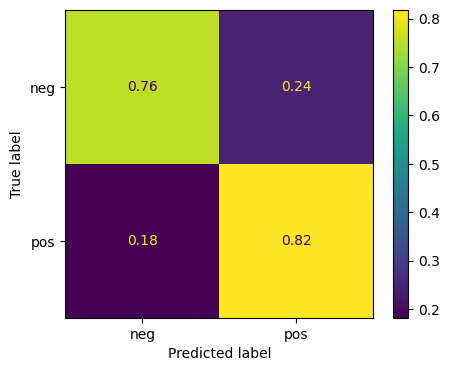

In [83]:
fig, ax = plt.subplots(figsize=(5, 4))
ConfusionMatrixDisplay.from_predictions(
    y_true=valid_labels,
    y_pred=valid_preds,
    ax=ax,
    normalize="true",
    display_labels=['neg', 'pos'],
)


**Code Explanation:**

- The line `fig, ax = plt.subplots(figsize=(5, 4))` initializes a new plotting figure with a specified size using the matplotlib library.
- Following , `ConfusionMatrixDisplay.from_predictions(...)` is a method from the `scikit-learn` library that directly computes and displays a confusion matrix from the true labels `(y_true=test_labels)` and the predicted labels `(y_pred=test_preds)`.
- The ax=ax argument ensures the confusion matrix is plotted onto the previously initialized figure.
- With 'normalize="true"', the matrix displays values as proportions of the true labels, offering an intuitive understanding of model accuracy across classes.
- Finally, `display_labels=['neg', 'pos']` provides descriptive axis labels, indicating that the classification discerns between 'negative' and 'positive' reviews.

Overall, the code visualizes the model's accuracy and potential misclassifications in a structured and interpretable format.

In [84]:
# log the Confusion Matrix to Wandb
wandb.log({"conf_mat": wandb.plot.confusion_matrix(
    preds=valid_preds, y_true=valid_labels,
    class_names=['neg', 'pos'])})


In [85]:
wandb.finish()


eval/accuracy,▁▃██
eval/f1,▁▆██
eval/loss,█▅▁▁
eval/runtime,▅█▂▁
eval/samples_per_second,▄▁▇█
eval/steps_per_second,▄▁▇█
train/epoch,▁▁▄▄▇▇██
train/global_step,▁▁▄▄▇▇███
train/learning_rate,█▄▁
train/loss,█▄▁
train/total_flos,▁


### <font color = 'pickle'> **Check the best saved model**</font>


In [86]:
# After training, let us check the best checkpoint
# We need this for Predioctions and Evaluations
best_model_checkpoint_step = trainer.state.best_model_checkpoint.split('-')[-1]
print(f"The best model was saved at step {best_model_checkpoint_step}.")


The best model was saved at step 60.


#  <font color = 'pickle'> **Inference**

## <font color = 'pickle'> **Create pipelne for inference**

In [87]:
from transformers import pipeline


In [88]:
checkpoint = str(model_folder/'checkpoint-60')
custom_pipeline = pipeline(
    task="text-classification",
    model=checkpoint,
    tokenizer=checkpoint,
    device=0)


## <font color = 'pickle'> **Test Set Evaluation**


In [89]:
from evaluate import evaluator


In [90]:
test_split_small


Dataset({
    features: ['text', 'label'],
    num_rows: 100
})

In [91]:
task_evaluator = evaluator("text-classification")


In [92]:
model.config.label2id


{'neg': 0, 'pos': 1}

In [93]:
eval_results = task_evaluator.compute(
    model_or_pipeline=custom_pipeline,
    data=test_split_small,
    metric=evaluate.combine(["accuracy", "recall", "precision", "f1"]),
    label_mapping={'neg': 0, 'pos': 1},
    device=0
)
eval_results


{'accuracy': 0.88,
 'recall': 0.9183673469387755,
 'precision': 0.8490566037735849,
 'f1': 0.8823529411764707,
 'total_time_in_seconds': 2.3106165169999713,
 'samples_per_second': 43.27849267252565,
 'latency_in_seconds': 0.023106165169999714}

In [94]:
import pandas as pd
pd.DataFrame([eval_results])


,accuracy,recall,precision,f1,total_time_in_seconds,samples_per_second,latency_in_seconds
0,0.88,0.918367,0.849057,0.882353,2.310617,43.278493,0.023106


##  <font color = 'pickle'> **Prediction for individual or small list of examples**

In [95]:
sample = test_split_small['text'][0]
preds = custom_pipeline(sample)
preds


[{'label': 'neg', 'score': 0.6848807334899902}]

In [96]:
sample = test_split_small['text'][11]
len(sample.split())


207

In [97]:
preds = custom_pipeline(sample)
preds


[{'label': 'neg', 'score': 0.6932343244552612}]

## <font color = 'pickle'> **Prediction for large dataset**

In [98]:
predictions = custom_pipeline(test_split_small['text'], truncation=True)


In [99]:
predictions


[{'label': 'neg', 'score': 0.6848807334899902},
 {'label': 'pos', 'score': 0.7193291783332825},
 {'label': 'pos', 'score': 0.5725695490837097},
 {'label': 'pos', 'score': 0.6379843354225159},
 {'label': 'pos', 'score': 0.7564436197280884},
 {'label': 'neg', 'score': 0.7202953100204468},
 {'label': 'neg', 'score': 0.5226587057113647},
 {'label': 'pos', 'score': 0.5349242687225342},
 {'label': 'pos', 'score': 0.7167651057243347},
 {'label': 'pos', 'score': 0.7064896821975708},
 {'label': 'pos', 'score': 0.7752800583839417},
 {'label': 'neg', 'score': 0.6932343244552612},
 {'label': 'neg', 'score': 0.6433656811714172},
 {'label': 'pos', 'score': 0.7261587977409363},
 {'label': 'pos', 'score': 0.507376492023468},
 {'label': 'pos', 'score': 0.6323773264884949},
 {'label': 'pos', 'score': 0.6911032199859619},
 {'label': 'pos', 'score': 0.785687267780304},
 {'label': 'pos', 'score': 0.7520511746406555},
 {'label': 'pos', 'score': 0.6897446513175964},
 {'label': 'pos', 'score': 0.7249759435653